In [47]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv('steel-plate-dataset.csv')
df.head(3)
print(df.info())
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19219 entries, 0 to 19218
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     19219 non-null  int64  
 1   X_Minimum              19219 non-null  int64  
 2   X_Maximum              19219 non-null  int64  
 3   Y_Minimum              19219 non-null  int64  
 4   Y_Maximum              19219 non-null  int64  
 5   Pixels_Areas           19219 non-null  int64  
 6   X_Perimeter            19219 non-null  int64  
 7   Y_Perimeter            19219 non-null  int64  
 8   Sum_of_Luminosity      19219 non-null  int64  
 9   Minimum_of_Luminosity  19219 non-null  int64  
 10  Maximum_of_Luminosity  19219 non-null  int64  
 11  Length_of_Conveyer     19219 non-null  int64  
 12  TypeOfSteel_A300       19219 non-null  int64  
 13  TypeOfSteel_A400       19219 non-null  int64  
 14  Steel_Plate_Thickness  19219 non-null  int64  
 15  Ed

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,...,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,1,808,816,728350,728372,433,20,54,44478,70,...,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,...,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0


# Detect outliers for one column:

<Axes: xlabel='Luminosity_Index'>

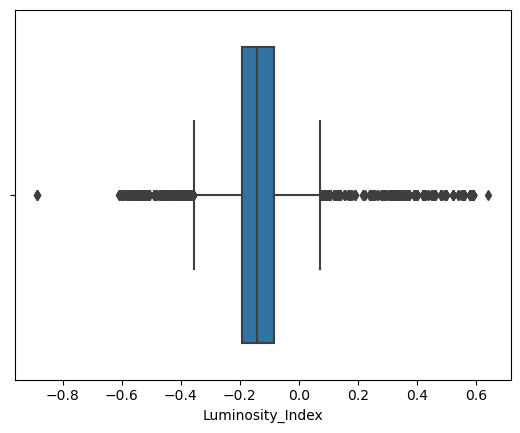

In [31]:
# First I will use seaborn boxplot to show distribution of data.
sns.boxplot(data=df, x='Luminosity_Index')

# we want to detect: samples > upper cap or samples < lower_cap

In [32]:
Q3 = df['Luminosity_Index'].quantile(0.75)
Q1 = df['Luminosity_Index'].quantile(0.25)
IQR = Q3 - Q1 

upper_cap = Q3 + 1.5*IQR
lower_cap = Q1 - 1.5*IQR

In [33]:
flags = (df['Luminosity_Index'] > upper_cap) | (df['Luminosity_Index'] < lower_cap)
upper_flags = df['Luminosity_Index'] > upper_cap
lower_flags = df['Luminosity_Index'] < lower_cap

print(flags.sum(), upper_flags.sum(), lower_flags.sum())
# we have 999 samples those are outliers.

999 399 600


In [34]:
# method-1: replace outliers with upper_cap/lower_cap

df['Luminosity_Index'][upper_flags] =  upper_cap
df['Luminosity_Index'][lower_flags] =  lower_cap
# don't worry about warning!

C:\Users\Darab Store\AppData\Local\Temp\ipykernel_9932\3534272615.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Luminosity_Index'][upper_flags] =  upper_cap
C:\Users\Darab Store\AppData\Local\Temp\ipykernel_9932\3534272615.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Luminosity_Index'][lower_flags] =  lower_cap


<Axes: xlabel='Luminosity_Index'>

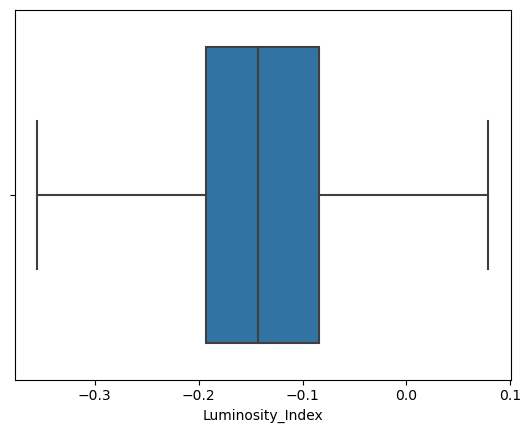

In [35]:
# now check boxplot
sns.boxplot(data=df, x='Luminosity_Index')

# you can see there are not outliers anymore.

In [42]:
df[flags]

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
13,13,974,985,1211728,1211795,81,14,13,9137,148,...,0.3077,0.07875,0.2253,0,0,0,0,0,0,1
31,31,1644,1661,2552670,2552812,762,102,155,63525,28,...,0.9481,-0.35525,0.9994,0,0,0,0,0,0,1
57,57,1205,1216,393428,393468,53,15,14,5464,178,...,0.4286,0.07875,0.1852,0,0,0,0,0,0,1
67,67,1677,1686,1319063,1319076,91,10,15,5608,57,...,0.3333,-0.35525,0.2660,1,0,0,0,0,0,0
114,114,1565,1583,1009876,1009999,5702,126,201,516343,63,...,0.7692,-0.35525,1.0000,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19094,19094,1053,1063,945792,945807,63,19,19,6167,172,...,0.5000,0.07875,0.2300,0,0,0,0,0,0,1
19123,19123,1677,1688,350481,350500,192,25,31,12773,55,...,0.7419,-0.35525,0.4106,1,0,0,0,0,0,0
19184,19184,30,40,398837,398889,1753,150,285,2156667,27,...,0.7188,-0.35525,0.9998,1,0,0,0,0,0,0
19189,19189,575,587,7003,7020,170,18,17,21545,153,...,0.1765,0.07875,0.3479,0,0,0,0,0,0,0


In [44]:
# Method-2: drop outliers

df.drop(df[flags].index, inplace=True)
df['Luminosity_Index'].shape

(18220,)

<Axes: xlabel='Luminosity_Index'>

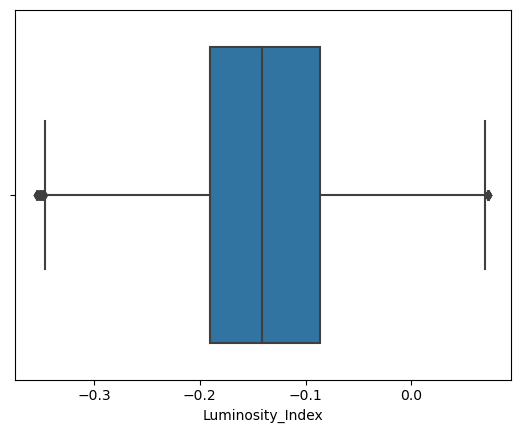

In [45]:
sns.boxplot(data=df, x='Luminosity_Index')

# Write a loop for replacing outliers with caps:

In [54]:
df.drop('id', axis=1, inplace=True)

In [55]:
df.columns

Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults'],
      dtype='object')

In [56]:
# I want to detect outliers for input columns, so I am going to split X,y. 
# Notice our data must be series not numpy array, so I will use tuple for split dataset.

X = df[['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas']]
y = df[['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults']]

C:\Users\Darab Store\AppData\Local\Temp\ipykernel_9932\3628808796.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col][upper_flags] = upper_cap
C:\Users\Darab Store\AppData\Local\Temp\ipykernel_9932\3628808796.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col][lower_flags] = lower_cap
C:\Users\Darab Store\AppData\Local\Temp\ipykernel_9932\3628808796.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col][upper_flags

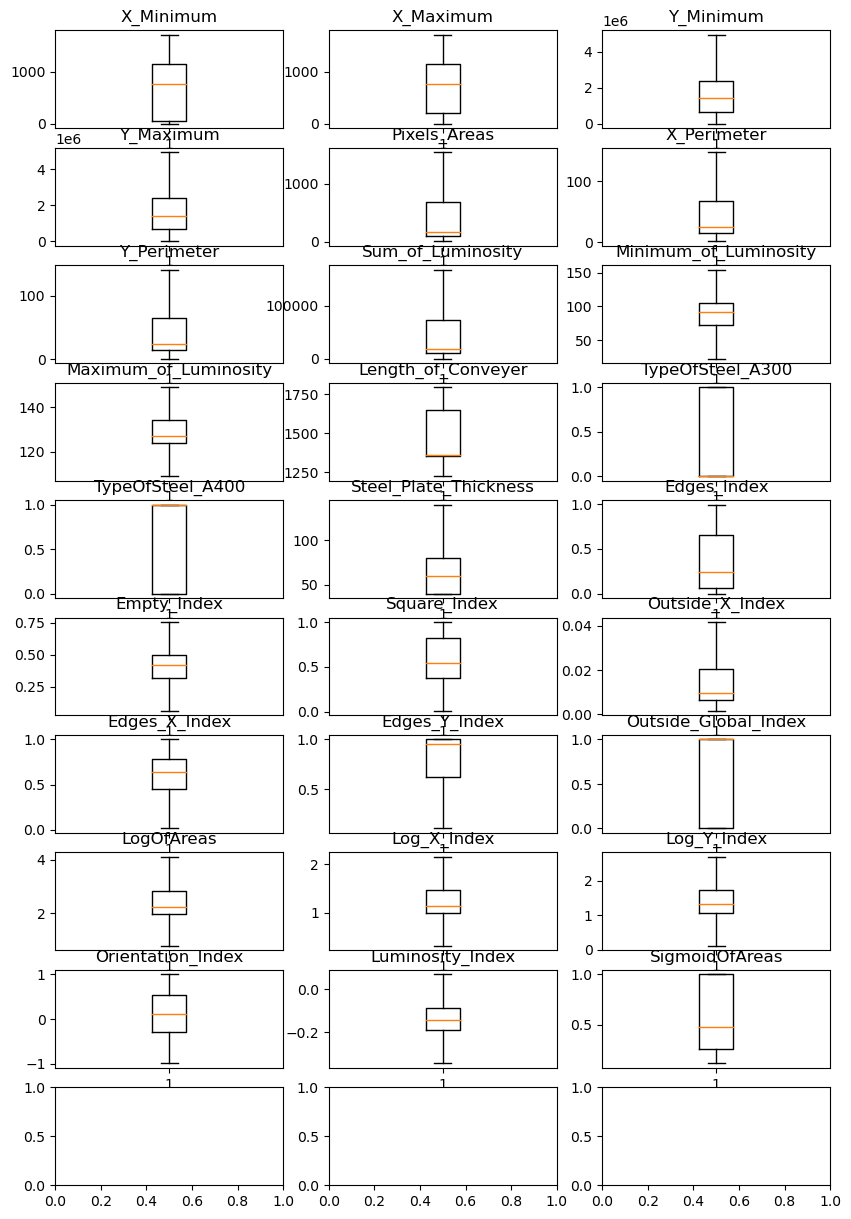

In [65]:
for col in X.columns:
    Q3 = X[col].quantile(0.75)
    Q1 = X[col].quantile(0.25)
    IQR = Q3 - Q1
    upper_cap = Q3 + 1.5*IQR
    lower_cap = Q1 - 1.5*IQR

    upper_flags = X[col] > upper_cap
    lower_flags = X[col] < lower_cap

    X[col][upper_flags] = upper_cap
    X[col][lower_flags] = lower_cap

fig, axes = plt.subplots(10, 3, figsize=(10,15))
axes_flat = axes.flatten()
    
for i, col in enumerate(X.columns):
    ax = axes_flat[i]
    ax.boxplot(X[col])
    ax.set_title(col)